In [1]:
import pandas as pd
import sdm_bio.utils as sdm_util
import sdm_bio
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

In [2]:
df = pd.read_parquet("../../data/features.parquet")

c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(<Figure size 1000x1200 with 1 Axes>,
 <Axes: title={'center': 'Points on Map'}, xlabel='Longitude', ylabel='Latitude'>)

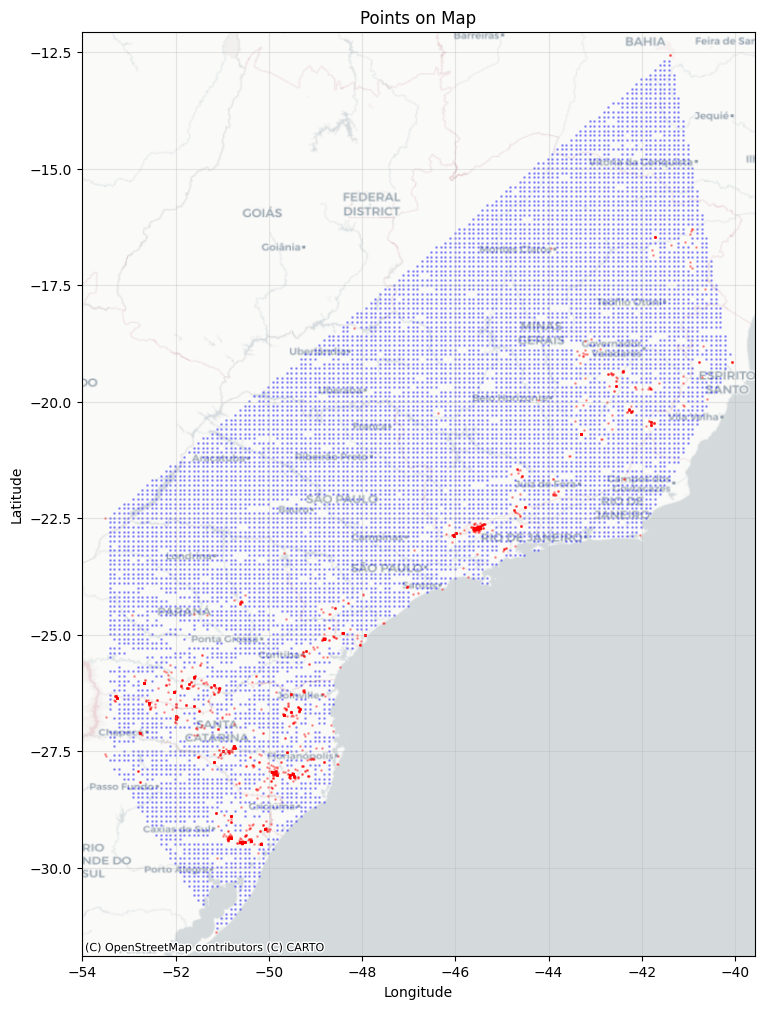

In [3]:
geoframe = sdm_util.pandas_to_geoframe(df)
dataframe = sdm_util.remove_points_within_radius(geoframe=geoframe, R= 0.1)
sdm_util.plot_points(dataframe)

In [4]:
df_cp = df.copy().dropna()
y = df_cp.pop("target")
X = df_cp.copy().drop(columns=['lat','lon'])

In [5]:
def corrrelation(dataset: pd.DataFrame, threshold: float = 0.7):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

cols = corrrelation(X)

In [6]:
X_CP = X.drop(columns=cols)

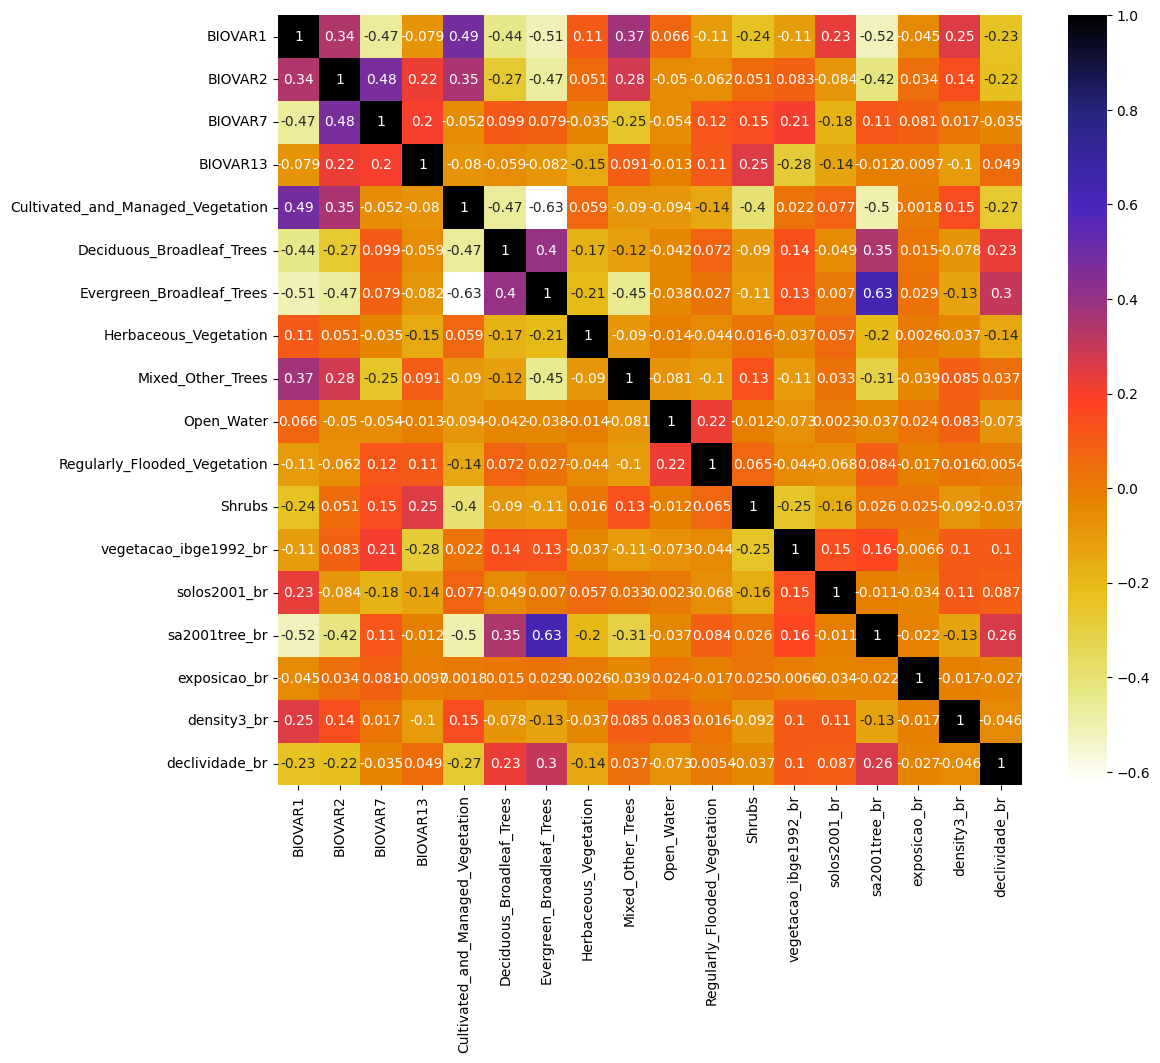

In [7]:
plt.figure(figsize=(12,10))
cor = X_CP.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

In [8]:
X_CP = X_CP.dropna()

MaxEnt
MaxEnt 5-fold Cross Validation Accuracy: 88.97 (+/- 1.02)

Accuracy Score: 0.88

Classification report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2108
           1       0.74      0.66      0.70       566

    accuracy                           0.88      2674
   macro avg       0.83      0.80      0.81      2674
weighted avg       0.88      0.88      0.88      2674


Confussion matrix
[[1980  128]
 [ 193  373]]

AUC(ROC): 0.80



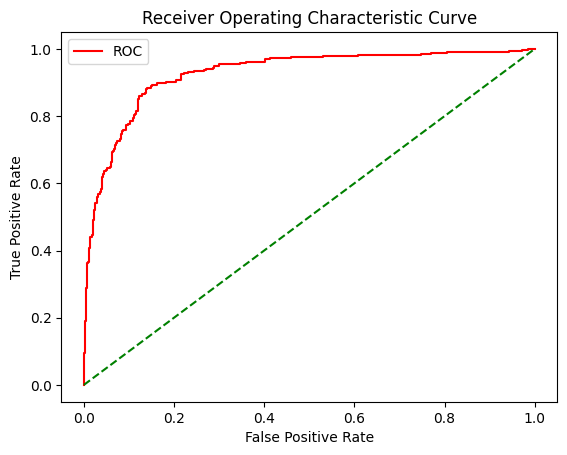

In [9]:
maxent = LogisticRegression(max_iter=3_000)
maxent = sdm_bio.evaluate_clf(maxent, X_CP, y, "MaxEnt", k=5, test_size=0.2, scoring="f1_weighted", feature_names=X_CP.columns)

MaxEnt
MaxEnt 5-fold Cross Validation Accuracy: 88.72 (+/- 1.41)

Accuracy Score: 0.89

Classification report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2108
           1       0.79      0.65      0.71       566

    accuracy                           0.89      2674
   macro avg       0.85      0.80      0.82      2674
weighted avg       0.88      0.89      0.88      2674


Confussion matrix
[[2008  100]
 [ 198  368]]

AUC(ROC): 0.80



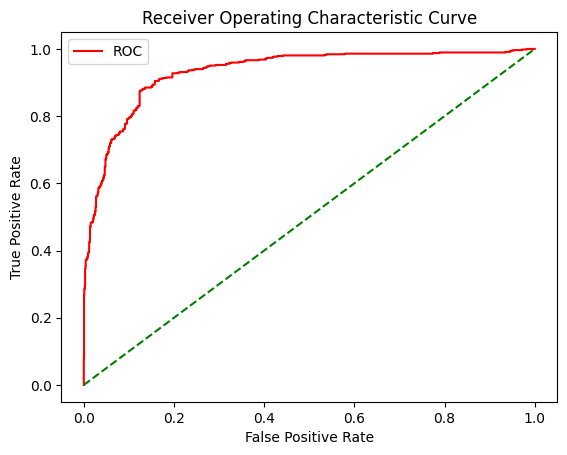

In [10]:
maxent_pipe = LogisticRegression(max_iter=3_000)
maxent_pipe = sdm_bio.models.pipe_evaluate_clf(maxent_pipe, X_CP, y, "MaxEnt", k=5, test_size=0.2, scoring="f1_weighted", feature_names=X_CP.columns)

In [11]:
X_CP.columns

Index(['BIOVAR1', 'BIOVAR2', 'BIOVAR7', 'BIOVAR13',
       'Cultivated_and_Managed_Vegetation', 'Deciduous_Broadleaf_Trees',
       'Evergreen_Broadleaf_Trees', 'Herbaceous_Vegetation',
       'Mixed_Other_Trees', 'Open_Water', 'Regularly_Flooded_Vegetation',
       'Shrubs', 'vegetacao_ibge1992_br', 'solos2001_br', 'sa2001tree_br',
       'exposicao_br', 'density3_br', 'declividade_br'],
      dtype='object')

## Arquivos com BR no final estão com problemas

In [18]:
paths = [
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_1.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_2.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_3.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_4.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_5.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_6.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_7.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_8.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_9.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_10.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_11.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_12.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_13.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_14.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_15.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_16.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_17.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_18.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_cropped/wc2.1_30s_bio_19.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Cultivated_and_Managed_Vegetation.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Deciduous_Broadleaf_Trees.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Evergreen_Broadleaf_Trees.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Herbaceous_Vegetation.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Mixed_Other_Trees.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Open_Water.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Regularly_Flooded_Vegetation.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/Shrubs.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/vegetacao_ibge1992_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/solos2001_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/sa2001tree_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/exposicao_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/density3_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/declividade_br.tif',
    'C:/Users/kenji/dev/web-scraping-images-vinacea/web-scraping-images-vinacea/generated_files/mantiqueira_transformed/altitude_br.tif'
]
columns = [
    'BIOVAR1',
    'BIOVAR2',
    'BIOVAR3',
    'BIOVAR4',
    'BIOVAR5',
    'BIOVAR6',
    'BIOVAR7',
    'BIOVAR8',
    'BIOVAR9',
    'BIOVAR10',
    'BIOVAR11',
    'BIOVAR12',
    'BIOVAR13',
    'BIOVAR14',
    'BIOVAR15',
    'BIOVAR16',
    'BIOVAR17',
    'BIOVAR18',
    'BIOVAR19',
    'Cultivated_and_Managed_Vegetation',
    'Deciduous_Broadleaf_Trees',
    'Evergreen_Broadleaf_Trees',
    'Herbaceous_Vegetation',
    'Mixed_Other_Trees',
    'Open_Water',
    'Regularly_Flooded_Vegetation',
    'Shrubs',
    'vegetacao_ibge1992_br',
    'solos2001_br',
    'sa2001tree_br',
    'exposicao_br',
    'density3_br',
    'declividade_br',
    'altitude_br',
    'Presence'
]

In [19]:
tiff_files = []
for p, col in zip(paths, columns):
    if col in X_CP.columns:
        tiff_files.append(p)

In [20]:
import pyimpute

In [22]:
sdm_bio.output_model(maxent_pipe, tiff_output_files=tiff_files, output_dir="../../data/output/maxent_pipe")

c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
sdm_bio.output_model(maxent, tiff_output_files=tiff_files, output_dir="../../data/output/maxent")

c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\sdm_bio_vinaceous-breasted-amazon\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import rasterio

In [24]:
files = ["../../data/output/maxent/probability_1.tif","../../data/output/maxent_pipe/probability_1.tif"]

dist = sdm_bio.get_dist_avg(files)

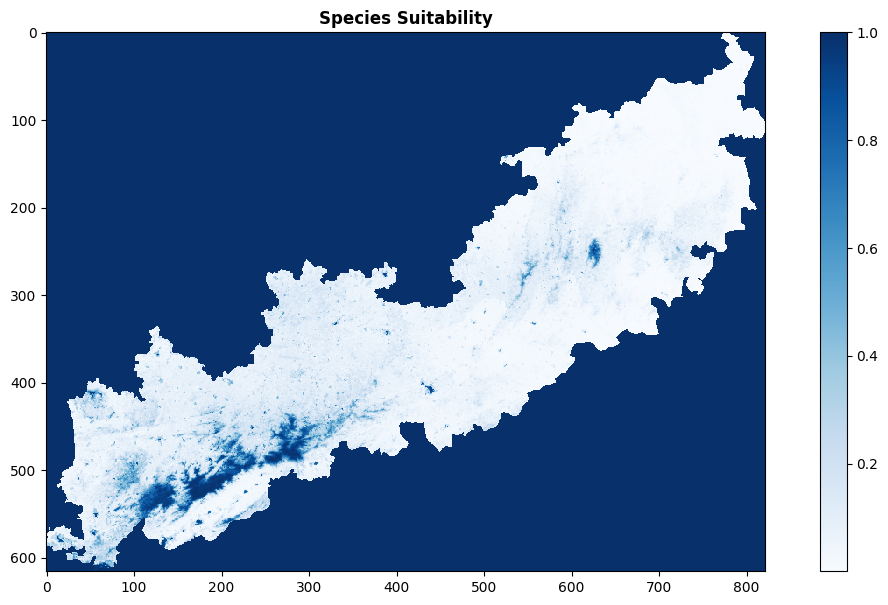

In [26]:
sdm_bio.plotit(
    dist, "Species Suitability", cmap="Blues"
)

In [28]:
import rasterio

with rasterio.open(files[0]) as f:
    dist_maxentpipe = f.read(1)
    
with rasterio.open(files[1]) as f:
    dst_maxent = f.read(1)


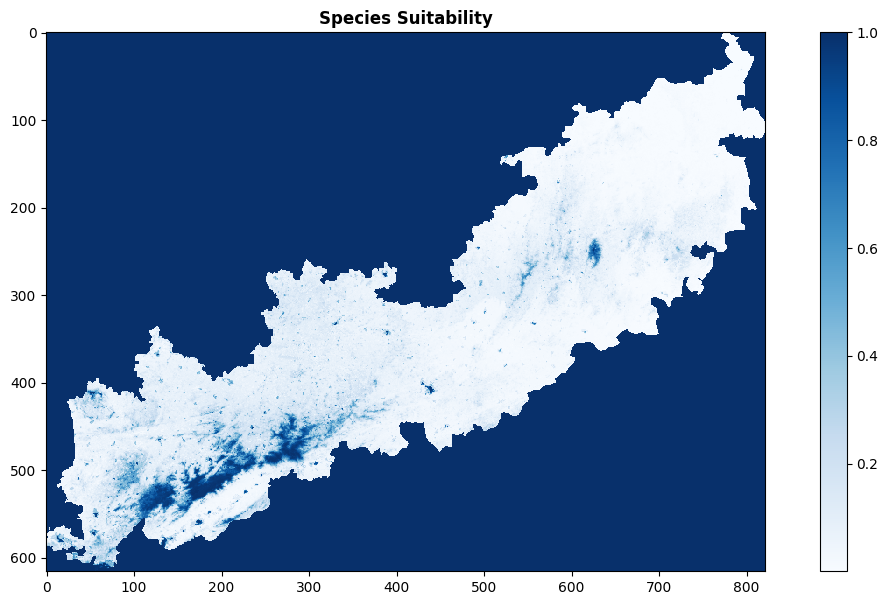

In [29]:
sdm_bio.plotit(
    dist_maxentpipe, "Species Suitability", cmap="Blues"
)

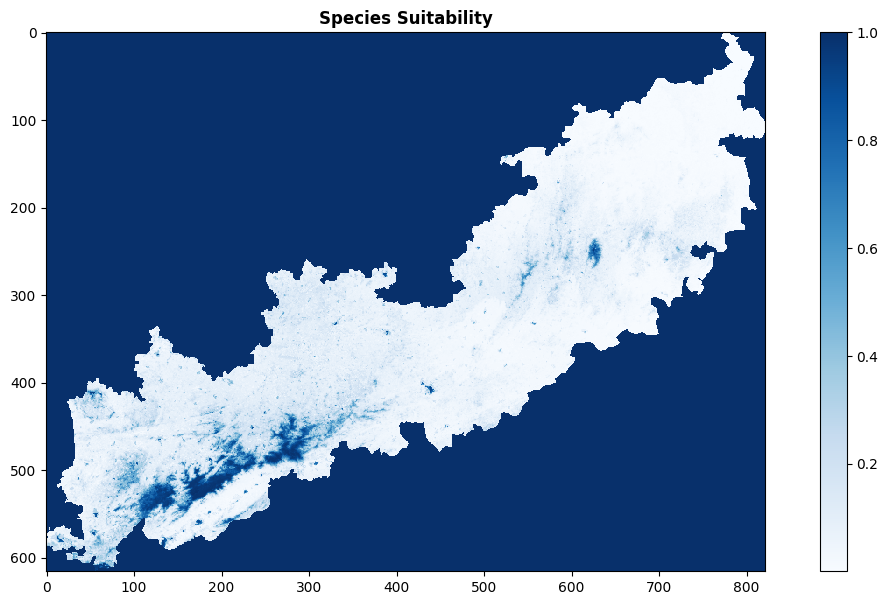

In [31]:
sdm_bio.plotit(
    dst_maxent, "Species Suitability", cmap="Blues"
)